# Business Understanding

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\hrcoh\AppData\Local\Temp\ipykernel_25264\2555783615.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#Explore summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#Looking at unique values in the columns that I don't fully understand
print(df['Amateur.Built'].unique(),'\n')
print(df['FAR.Description'].unique(),'\n')
print(df['Schedule'].unique(),'\n')
print(df['Report.Status'].unique(),'\n')
print(df['Registration.Number'].unique(),'\n')
print(df['Aircraft.damage'].unique(),'\n')
print(df['Engine.Type'].unique(),'\n')
print(df['Aircraft.Category'].unique())

['No' 'Yes' nan] 

[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107'] 

[nan 'SCHD' 'NSCH' 'UNK'] 

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind g

For our analysis, we can drop FAR Description, Schedule, and Registration Number. Report Status. Amateur Built, Aircraft Category, Engine Type and Aircraft Damage may be helpful.

In [7]:
#Understanding differences bewteen injury columns
print(df['Injury.Severity'].unique(),'\n')
print(df['Total.Fatal.Injuries'].unique(),'\n')
print(df['Total.Serious.Injuries'].unique(),'\n')
print(df['Total.Minor.Injuries'].unique(),'\n')
print(df['Total.Uninjured'].unique())

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)' 'Fatal(44)' 'Fatal(64)' 'Fatal(92

### Data Understanding Summary

There are 31 columns and 88889 rows.

These are some areas we'll consider cleaning or analyzing:

Injury Severity gives us similar information to Total Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured. We may consider splitting Injury Severity so it just has the word classification and the number of injuries will be kept in the other columns.

Unknown: There are values included in some columns like 'Unknown, UNK, and Unavailable that are the same thing as Nan. We will note this for later.

Ensure data types are correct for each column.

Ensure there are no duplicates and that value formatting is standardized.

Drop columns that do not give us relevant information.

## Data Preparation

In [8]:
df_copy = df.copy()

In [9]:
#Change date column to datetime data type
df['Event.Date']=pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [10]:
#Check for duplicates
df.duplicated().any()

False

In [11]:
#Checking for Missing Data or Nulls
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [12]:
#Checking how many nulls in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [13]:
#Checking what percentage of each column is null
df.isnull().sum()/df.shape[0]*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

Let's drop all columns with over 30% null or missing data. Here are the columns that have too many nulls values or are irrelevant to the current business question: Latitude, Longitude, Airport Code, Airport Name, Aircraft Category, Registration Number, FAR Description, Schedule, Air Carrier, and Publication Date.

In [14]:
#Drop columns with too many missing values or irrevlant to our business question
dropped_columns=['Schedule', 'Air.carrier', 'Longitude','Latitude','Registration.Number','Purpose.of.flight','Publication.Date', 'Airport.Code','Airport.Name','Aircraft.Category', 'FAR.Description']
df=df.drop(dropped_columns, axis=1)

In [15]:
#confirming the columns were dropped
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [16]:
#Drop some rows with missing data
df=df.dropna(subset=['Make','Model','Amateur.Built'])
print(df.isnull().sum()/df.shape[0]*100)

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.054128
Country                    0.253727
Injury.Severity            1.103994
Aircraft.damage            3.556688
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          6.702903
Engine.Type                7.833961
Total.Fatal.Injuries      12.765286
Total.Serious.Injuries    13.984303
Total.Minor.Injuries      13.330251
Total.Uninjured            6.572092
Weather.Condition          4.940346
Broad.phase.of.flight     30.461896
Report.Status              7.147207
dtype: float64


In [17]:
#impute continuous variables with the median
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df.isnull().sum()/df.shape[0]*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.054128
Country                    0.253727
Injury.Severity            1.103994
Aircraft.damage            3.556688
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                7.833961
Total.Fatal.Injuries      12.765286
Total.Serious.Injuries    13.984303
Total.Minor.Injuries      13.330251
Total.Uninjured            6.572092
Weather.Condition          4.940346
Broad.phase.of.flight     30.461896
Report.Status              7.147207
dtype: float64

In [18]:
#Clean Injury Severity Column so it does not include the paranthesis since the exact number of injuries is included in the other columns.
df['Injury.Severity']=df['Injury.Severity'].str.split('(').str[0]
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,No,1.0,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [19]:
#Change Unknown, UNK, and Unavailable to Nan.
df.replace(['Unknown','UNK','Unavailable'],np.nan, inplace=True)

In [20]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [21]:
#Change column names
rename_columns= {'Event.Id':'ID', 'Investigation.Type':'Type', 'Accident.Number':'Accident_Number', 'Event.Date':'Date',
    'Injury.Severity':'Injury_Severity', 'Aircraft.damage':'Damage','Amateur.Built':'Amateur_Built',
       'Number.of.Engines':'Engines', 'Engine.Type':'Engine_Type',
     'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
       'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',
       'Broad.phase.of.flight':'Flight_Phase', 'Report.Status':'Report_Status'}
df=df.rename(columns=rename_columns)

In [22]:
df.isnull().sum()/df.shape[0]*100

ID                   0.000000
Type                 0.000000
Accident_Number      0.000000
Date                 0.000000
Location             0.055256
Country              0.257110
Injury_Severity      1.199847
Damage               3.690882
Make                 0.022554
Model                0.003383
Amateur_Built        0.000000
Engines              0.000000
Engine_Type         10.143440
Fatal_Injuries      12.765286
Serious_Injuries    13.984303
Minor_Injuries      13.330251
Uninjured            6.572092
Weather              5.903381
Flight_Phase        31.079862
Report_Status        7.147207
dtype: float64

Now we'll clean the Country and Location columns. 

In [23]:
#Checking what percentage of values are in each country
df['Country'].value_counts()/(len(df['Country']))

Country
United States                       0.926690
Brazil                              0.004161
Mexico                              0.004026
Canada                              0.003992
United Kingdom                      0.003778
                                      ...   
Palau                               0.000011
Bosnia and Herzegovina              0.000011
Libya                               0.000011
Saint Vincent and the Grenadines    0.000011
Turks and Caicos Islands            0.000011
Name: count, Length: 217, dtype: float64

Almost 93% of these reported accidents occurred in the United States so we will focus our analysis on accidents in the USA. We will drop rows with accidents outside the USA mainland.   

In [24]:
df.drop(df[df.Country != 'United States'].index, inplace=True)

In [25]:
df['Country'].value_counts()

Country
United States    82177
Name: count, dtype: int64

In [26]:
#Split location into into city and state
df['City']=df['Location'].str.split(',').str[0]
df['State']=df['Location'].str.split(',').str[-1]

In [27]:
#Drop Location column
df=df.drop('Location',axis=1)
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Make,Model,Amateur_Built,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,...,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,Rockwell,112,No,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,Cessna,501,No,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,Canton,OH


In [28]:
#Standardize data from all caps
df['Make']=df['Make'].str.title()
df['City']=df['City'].str.title()
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Make,Model,Amateur_Built,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,...,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,Rockwell,112,No,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,Cessna,501,No,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,Canton,OH


In [29]:
#Replace continuous variables with the median
continuous_variables=['Engines','Fatal_Injuries','Serious_Injuries','Minor_Injuries','Uninjured']
df[continuous_variables]=df[continuous_variables].fillna(df[continuous_variables].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82177 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                82177 non-null  object        
 1   Type              82177 non-null  object        
 2   Accident_Number   82177 non-null  object        
 3   Date              82177 non-null  datetime64[ns]
 4   Country           82177 non-null  object        
 5   Injury_Severity   82060 non-null  object        
 6   Damage            80159 non-null  object        
 7   Make              82157 non-null  object        
 8   Model             82174 non-null  object        
 9   Amateur_Built     82177 non-null  object        
 10  Engines           82177 non-null  float64       
 11  Engine_Type       77767 non-null  object        
 12  Fatal_Injuries    82177 non-null  float64       
 13  Serious_Injuries  82177 non-null  float64       
 14  Minor_Injuries    82177 non

In [30]:
# Clean 'Make' Column. Remove spaces.
df['Make'].str.strip()
df['Make'].duplicated().value_counts()

Make
True     74785
False     7392
Name: count, dtype: int64

Why are some values showing up multiple times? For example Piper and Cessena.

In [31]:
#seperate models from aircraft type
df['Model'].value_counts()

Model
152                2323
172                1637
172N               1136
PA-28-140           909
150                 790
                   ... 
THORP T18CWS          1
AVRO 146-RJ70A        1
ULTRA SPORT 254       1
A-300B4-605R          1
PA42                  1
Name: count, Length: 11432, dtype: int64

In [32]:
df.Make.value_counts()

Make
Cessna           25846
Piper            14164
Beech             5058
Bell              2285
Boeing            1483
                 ...  
Spagnoletti          1
Reichert             1
Wild Goose           1
Valenza              1
Royse Ralph L        1
Name: count, Length: 7391, dtype: int64

In [33]:
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Make,Model,Amateur_Built,...,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Flight_Phase,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,...,Reciprocating,2.0,0.0,0.0,0.0,NaN,Cruise,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,...,Reciprocating,4.0,0.0,0.0,0.0,NaN,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,...,Reciprocating,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,Rockwell,112,No,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,Cessna,501,No,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Canton,OH


In [40]:
#Cleaning Model Column. Start by looking at top 50 values
df.Model.value_counts().head(50)

Model
PA       11824
152       2329
172       1658
G         1184
172N      1136
150        806
172M       773
AT         697
172P       680
180        626
182        603
150M       578
S          575
M          558
AA         535
206B       499
150L       452
A          451
47G        438
A36        435
RV         420
140        400
UH         388
DC         387
170B       387
108        382
172S       368
269C       362
206        354
737        353
DHC        352
PA28       351
182P       348
C          336
S2R        335
R          323
A188B      307
7AC        297
177        292
J3C        288
185        283
A185F      278
7GCBC      277
M20J       277
7ECA       268
206L       266
35         264
95         263
150F       262
182Q       261
Name: count, dtype: int64

Many models start with the same number like 172, 150, 206, and 182 are followed by other letters. Let's group some of the more commonly occuring numbers.

In [54]:
df['Model_Simplified']=df['Model'].str.slice(0,3)

In [55]:
df['Model_Simplified'].value_counts().head(50)

Model_Simplified
PA     11824
172     6358
150     3107
182     2573
152     2406
206     1318
M20     1203
G       1184
180     1064
A18      772
T21      763
177      726
210      724
AT       697
170      694
PA       680
R22      611
PA2      598
269      582
S        575
M        558
47G      557
310      546
AA       535
A36      511
369      506
185      465
A        451
140      439
RV       420
7GC      417
DHC      402
R44      388
UH       388
108      388
DC       387
737      386
S2R      358
7EC      349
SR2      347
C        336
R        323
7AC      308
SGS      305
J3C      299
421      298
U20      295
V35      279
402      266
35       264
Name: count, dtype: int64

### Data Preparation Summary


Here is a recap of the steps we took for data preparation:

1. Changed Event Date to datetime format.
2. Checked for duplicates.
3. Checked for null values and decided to drop columns that contained over 30% null values.
4. Dropped columns that we did not need for this partifcular analysis.
5. Dropped certain rows with missing data for Make, Model, and Amateur Build.
6. Split Injury Severity column to only contain the first word since the exact number is contained in the other columns.
7. Rename columns to simplify analyses.
8. Replaced null values with the median in Number of Engines column.
9. Replaced variations of value Unknown with a standardized version.
10. Limited data set to just USA.
11. Split location into city and state columns.
12. Replaced Engines, Fatal Injuries, Serious Injuries, and Uninjured columns with median.
13. Create simplified Model column containing zero to three digits or letters of Model to contain larger groups of Models and give us the ability to drill down if needed.

In [58]:
df.to_csv('aviation.csv')

In [35]:
#pd to csv and look at visualizations in tableau
#50% drop column, less than 5% drop rows
#think about what factors the company can actually control (weather vs model). go from engine to amateur build to engine type
#since dataset is only incidents, look at factors of relative safety. also percentage of passengers who died consider total people on flight

# Exploratory Data Analysis

In [47]:
import seaborn as sns

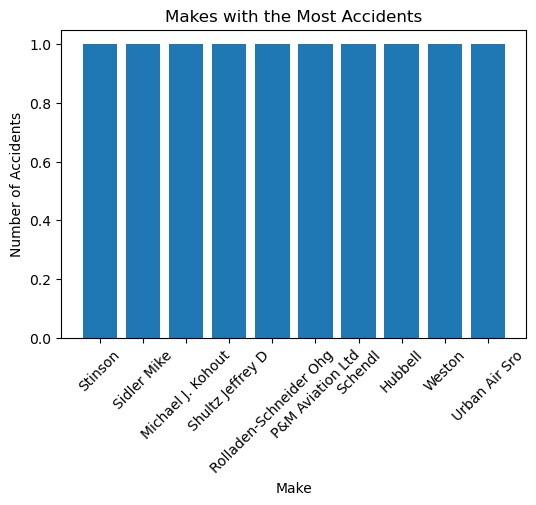

In [49]:
# Visualzing Makes Involved in Accidents
top_10_makes=df['Make'].value_counts().head(10)
plt.figure(figsize=(6,4))
plt.bar(top_10_makes.index, top_10_makes.values)
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.title('Makes with the Most Accidents')
plt.xticks(rotation=45)
plt.show()

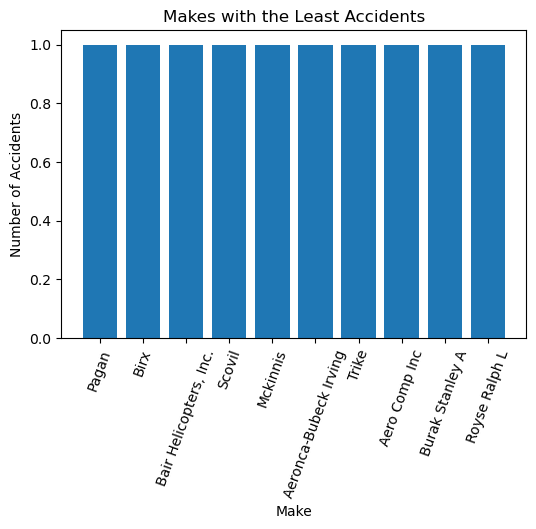

In [29]:
#Which models of each make were involved in accidents
top_10_makes=df['Make'].value_counts().head(10)
plt.figure(figsize=(6,4))
plt.bar(top_10_makes.index, top_10_makes.values)
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.title('Makes with the Most Accidents')
plt.xticks(rotation=45)
plt.show()

# Conclusions

## Limitations

## Recommendations

## Next Steps